##### ERA5 Global Reanalysis - This data set covers a massive amount of atmospheric and weather data, including precipitation and temperature data, which spans as far back as the mid-1900s (Hersbach et al, 2020). The ERA5 Global Reanalysis was created by the European Center for Medium-Range Weather Forecasts, and is consistently updated with both new and changing atmospheric data (ECMWF, n.d.). My specific dataset has been taken from the "Climate Data Store," which was created by the ECMWF and Copernicus Climate Change Service, where I have pulled data from the "ERA5 Monthly Averaged Data on Single Levels from 1959 to Present" dataset (Climate Data Store, 2022). Because of the size of this data set, my research will center around the Northeast U.S., with latitudes between 38 N and 48 N and longitudes between 80 W and 67.5 W. The data variable I will be focusing on is total precipitation, which will only account for land precipitation and not include any ocean precipitation data.

##### Hersbach, H, Bell, B, Berrisford, P, et al. (2020). The ERA5 Global Reanalysis. Q J R Meteorol Soc. 2020; 146: 1999– 2049. https://doi.org/10.1002/qj.3803

##### ECMWF. (n.d.). ERA5. https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era5

##### Climate Data Store. (2022). ERA5 Monthly Averaged Data on Single Levels from 1959 to Present. ECMWF & Copernicus Climate Change Service. 
##### https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=overview

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

##### Importing my dataset, which contains ERA5 Daily Precipitation values by month for the years of 1990-2010

In [2]:
gribfile = '/home/jstiles4/clim680_dataset/ERA5_Reanalysis_Precip_dataset.grib'
ds = xr.open_dataset(gribfile,engine='cfgrib') 
ds

<xarray.Dataset>
Dimensions:     (time: 252, latitude: 41, longitude: 53)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 1989-12-31T18:00:00 ... 2010-11-30T18:0...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 48.0 47.75 47.5 47.25 ... 38.5 38.25 38.0
  * longitude   (longitude) float64 -80.0 -79.75 -79.5 ... -67.5 -67.25 -67.0
    valid_time  (time) datetime64[ns] ...
Data variables:
    tp          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-11-21T09:57 GRIB to CDM+CF via cfgrib-0.9.1...

##### Since the precipitation values are defined in units of m/day, I need to multiply them by 1000 to convert to mm/day

In [3]:
ds = ds*1000

##### Grouping the dataset by year

In [4]:
ds_year_g = ds.groupby('time.year').mean()

##### Calculating the mean tp value of the entire Northeast U.S. for every year between 1990-2010

In [6]:
ds_mean_1989 = np.mean(ds_year_g.tp[0])
ds_mean_1990 = np.mean(ds_year_g.tp[1])
ds_mean_1991 = np.mean(ds_year_g.tp[2])
ds_mean_1992 = np.mean(ds_year_g.tp[3])
ds_mean_1993 = np.mean(ds_year_g.tp[4])
ds_mean_1994 = np.mean(ds_year_g.tp[5])
ds_mean_1995 = np.mean(ds_year_g.tp[6])
ds_mean_1996 = np.mean(ds_year_g.tp[7])
ds_mean_1997 = np.mean(ds_year_g.tp[8])
ds_mean_1998 = np.mean(ds_year_g.tp[9])
ds_mean_1999 = np.mean(ds_year_g.tp[10])
ds_mean_2000 = np.mean(ds_year_g.tp[11])
ds_mean_2001 = np.mean(ds_year_g.tp[12])
ds_mean_2002 = np.mean(ds_year_g.tp[13])
ds_mean_2003 = np.mean(ds_year_g.tp[14])
ds_mean_2004 = np.mean(ds_year_g.tp[15])
ds_mean_2005 = np.mean(ds_year_g.tp[16])
ds_mean_2006 = np.mean(ds_year_g.tp[17])
ds_mean_2007 = np.mean(ds_year_g.tp[18])
ds_mean_2008 = np.mean(ds_year_g.tp[19])
ds_mean_2009 = np.mean(ds_year_g.tp[20])
ds_mean_2010 = np.mean(ds_year_g.tp[21])

##### By calculating all of the mean values in the above code, I then created an array of the mean values along with an array of each individual year. Using these two arrays, I was able to create a plot of the tp values by year.

Text(0.5, 1.0, 'Northeast U.S. Average Daily Precipiation by Year (mm/day)')

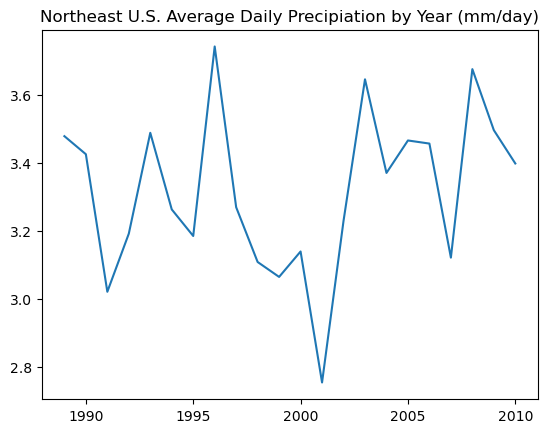

In [7]:
ds_mean = [3.4793215, 3.4261358, 3.020702, 3.1920278, 3.4892333, 3.2634468, 3.1851146, 3.7436862, 3.2698631, 3.1084793, 3.064508, 3.1394727, 2.753381,
          3.2296014, 3.6469543, 3.3709738, 3.46665, 3.4575107, 3.1213913, 3.6769118, 3.4970522, 3.398835]
ds_year = [1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
plt.plot(ds_year,ds_mean)
plt.title('Northeast U.S. Average Daily Precipiation by Year (mm/day)')

##### Organizing the mean daily precipitation values for every location over the entire time dimension

In [4]:
ds_mean=ds.mean(dim='time')

##### Plotting a simple contour plot for all of the mean daily precipitation values

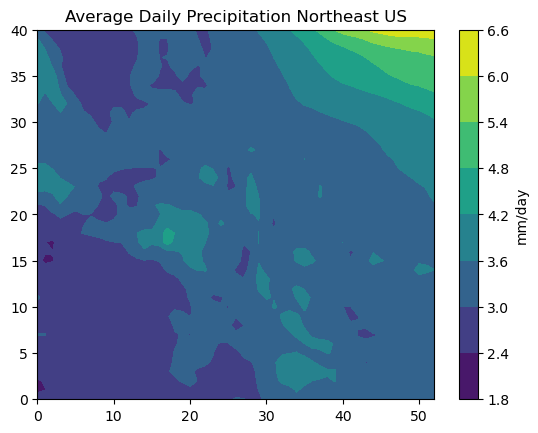

In [6]:
plt.contourf(ds_mean['tp'])
plt.title('Average Daily Precipitation Northeast US')
plt.colorbar(label='mm/day')

##### Now that I have calculated the mean daily precipitation values (tp), I can create a plot of this data by using Cartopy. For this plot, I used the AlbersEqualArea projection with a central longitude of 74W (-74) and central latitude of 43N (43). I then input the latitude and longitude ranges of my dataset, and also specified the contour intervals between 2.0-4.5 in intervals of 0.5 to account for all the mean values. I gave the contour a color scheme of 'YlGnBu' (Yellow Green Blue) as this was an effective way of showing areas of low and high average tp. In terms of the map features, I added coastlines, country borders and state borders from Cartopy. I also masked out the oceans and lakes by importing their features and assigning them a black color so that any data within these areas would not show up. 

##### Unfortunately, the specified range of my dataset contains precipitation data within Canada, which is outside of my region of interest. To solve this, I imported the ShapelyFeature package from Cartopy and downloaded a shape file for the entire continent of Canada. By then importing this shape file into the code (fname) and using ShapelyFeature to assign it a white color, this allowed me to mask any data within Canada out of the plot.

''

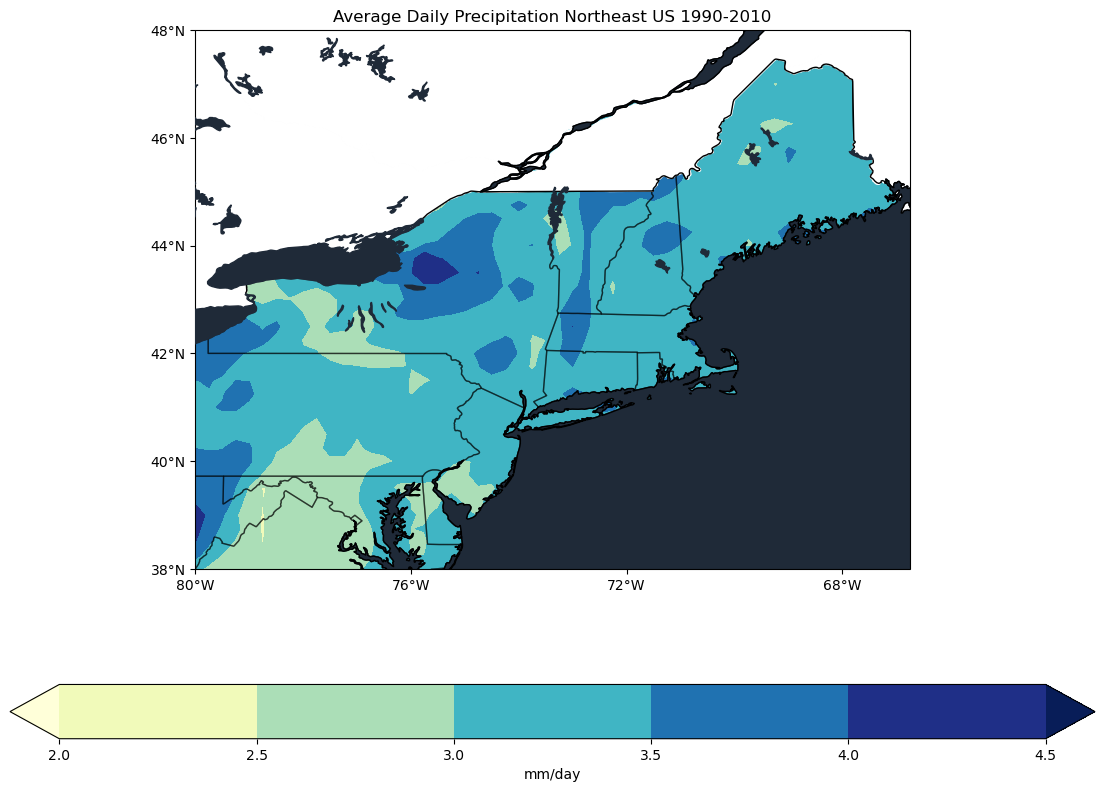

In [11]:
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=-74))

data=ds_mean['tp']
data, lons = add_cyclic_point(data, coord=ds['longitude'])


cs=ax.contourf(lons, ds['latitude'], data, levels=[2.0, 2.5, 3.0, 3.5, 4.0, 4.5],
            transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')

ax.add_feature(feature.OCEAN, zorder=2, color='#1F2A38')
ax.add_feature(feature.BORDERS, zorder=2, color='k')
ax.add_feature(feature.LAKES, zorder=3, color='#1F2A38')
ax.coastlines(zorder=3, color='k')
ax.add_feature(feature.BORDERS.with_scale('10m'), linestyle='-', alpha=.5)
ax.add_feature(feature.STATES.with_scale('10m'), linestyle='-', alpha=.5)
ax.set_xticks([-80,-76,-72,-68], crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
        
ax.set_yticks([38,40,42,44,46,48], crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

fname='/home/jstiles4/gadm41_CAN_1.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(), ccrs.PlateCarree(), edgecolor='black', color='white')
        
ax.add_feature(shape_feature)

plt.gcf().set_size_inches(20, 10)

cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='mm/day')

plt.title('Average Daily Precipitation Northeast US 1990-2010')
;